In [1]:
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
from simple_tritium_transport_model import (
    ureg,
    plot_integrated_top_release,
    plot_irradiation,
)
from simple_tritium_transport_model import plot_salt_inventory, plot_top_release

ureg.mpl_formatter = "{:~P}"

COLLECTION_VOLUME = 10 * ureg.ml
LSC_SAMPLE_VOLUME = 10 * ureg.ml

In [2]:
import baby_run_7

model_run_7 = baby_run_7.baby_model

model_run_7.run(15 * ureg.day)

/home/remidm/miniconda3/envs/libra-calculations/lib/python3.12/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


In [3]:
import baby_run_5

model_run_5 = baby_run_5.baby_model

model_run_5.run(7 * ureg.day)

In [10]:
total_vial_1_and_2_run_7 = 0
total_vial_3_and_4_run_7 = 0

for measurement_id, values in baby_run_7.measurements_after_background_sub.items():
    total_vial_1_and_2_run_7 += values[1] + values[2]
    total_vial_3_and_4_run_7 += values[3] + values[4]

total_vial_1_and_2_run_5 = 0
total_vial_3_and_4_run_5 = 0

for measurement_id, values in baby_run_5.measurements_after_background_sub.items():
    total_vial_1_and_2_run_5 += values[1] + values[2]
    total_vial_3_and_4_run_5 += values[3] + values[4]

/tmp/ipykernel_27885/1025945707.py:25: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(
/tmp/ipykernel_27885/1025945707.py:34: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(


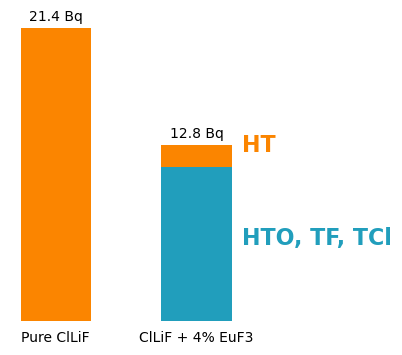

In [65]:
x_labels = ["Pure ClLiF", r"ClLiF + 4% EuF3"]
# plot the data for run 5 and run 7 as bars with different colours for vials 1-2 and 3-4
bar_width = 0.5
bar_spacing = 0.02
bar_positions = [0, 1]
plt.figure(figsize=(3, 4))
insoluble_bars = plt.bar(
    bar_positions,
    [total_vial_1_and_2_run_5, total_vial_1_and_2_run_7],
    bar_width,
    label="HTO + TF + TCl",
    color="#219EBC",
)
soluble_bars = plt.bar(
    bar_positions,
    [total_vial_3_and_4_run_5, total_vial_3_and_4_run_7],
    bar_width,
    label="HT",
    bottom=[total_vial_1_and_2_run_5, total_vial_1_and_2_run_7],
    color="#FB8500",
)
plt.xticks(bar_positions, x_labels)
plt.bar_label(soluble_bars, fmt="%.1f Bq", padding=3)

plt.annotate(
    "HTO, TF, TCl",
    xy=(1, 0.25),
    textcoords="axes fraction",
    color="#219EBC",
    fontsize=16,
    fontweight="bold",
)

plt.annotate(
    "HT",
    xy=(1, 0.55),
    textcoords="axes fraction",
    color="#FB8500",
    fontsize=16,
    fontweight="bold",
)

# remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

# remove yticks
plt.gca().tick_params(axis="y", which="both", left=False)
plt.gca().tick_params(axis="x", which="both", bottom=False)
plt.yticks([])

plt.ylabel(None)
plt.savefig("speciation.svg", bbox_inches="tight")
plt.show()

In [35]:
import baby_run_3

model_run_3 = baby_run_3.baby_model
model_run_3.run(6 * ureg.days)

import baby_run_4

model_run_4 = baby_run_4.baby_model
model_run_4.run(6 * ureg.day)

import baby_run_6

model_run_6 = baby_run_6.baby_model

model_run_6.run(7 * ureg.day)

import baby_run_8

model_run_8 = baby_run_8.baby_model

model_run_8.run(8 * ureg.day)

/home/remidm/miniconda3/envs/libra-calculations/lib/python3.12/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


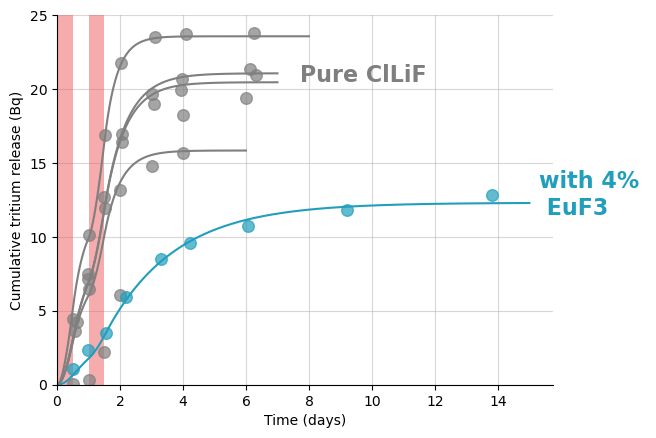

In [70]:
plt.figure()

plot_irradiation(model_run_3, facecolor="#EF5B5B", alpha=0.5)

color_run_3 = "tab:grey"
color_run_4 = "tab:grey"
color_run_5 = "tab:grey"
color_run_6 = "tab:grey"
color_run_7 = "#219EBC"
color_run_8 = "tab:grey"

plot_integrated_top_release(model_run_3, color=color_run_3, label="Run #3")

plt.scatter(
    baby_run_3.replacement_times,
    baby_run_3.cumulative_release,
    s=70,
    color=color_run_3,
    alpha=0.7,
)

plot_integrated_top_release(model_run_5, color=color_run_5, label="Run #5")

plt.scatter(
    baby_run_5.replacement_times,
    baby_run_5.cumulative_release,
    s=70,
    color=color_run_5,
    alpha=0.7,
)

plot_integrated_top_release(model_run_6, color=color_run_6, label="Run #6")

plt.scatter(
    baby_run_6.replacement_times,
    baby_run_6.cumulative_release,
    s=70,
    color=color_run_6,
    alpha=0.7,
)

plt.scatter(
    baby_run_4.replacement_times,
    baby_run_4.cumulative_release,
    s=70,
    color=color_run_4,
    alpha=0.7,
)

plot_integrated_top_release(model_run_7, color=color_run_7, label="Run #7")

plt.scatter(
    baby_run_7.replacement_times,
    baby_run_7.cumulative_release,
    s=70,
    color=color_run_7,
    alpha=0.7,
)

plot_integrated_top_release(model_run_8, color=color_run_8, label="Run #8")

plt.scatter(
    baby_run_8.replacement_times,
    baby_run_8.cumulative_release,
    s=70,
    color=color_run_8,
    alpha=0.7,
)


# plt.annotate("Run #4", (6 * ureg.days, 18 * ureg.Bq), color=color_run_4)

plt.xlim(left=0 * ureg.day)
plt.ylim(bottom=0)
plt.gca().spines[["right", "top"]].set_visible(False)
plt.grid(alpha=0.5)
# plt.legend(reverse=True)

plt.annotate(
    f"Pure ClLiF",
    (baby_run_6.baby_model.times[-1] * 1.1, baby_run_6.cumulative_release[-1]),
    color=color_run_6,
    va="center",
    fontsize=16,
    fontweight="bold",
)
plt.annotate(
    f"with 4% \n EuF3",
    (baby_run_7.baby_model.times[-1] * 1.02, baby_run_7.cumulative_release[-1]),
    color=color_run_7,
    va="center",
    fontsize=16,
    fontweight="bold",
)

# labelLines(plt.gca().get_lines(), zorder=2.5)
# plt.gcf().text(0.08, 0.97, "Cumulative tritium release", weight="bold", fontsize=15)
plt.xlabel("Time (days)")
plt.ylabel("Cumulative tritium release (Bq)")
plt.gca().set_axisbelow(True)
# plt.savefig("cumulative_release_compare_runs.pdf")
plt.savefig("cumulative_release_with_spice.svg", bbox_inches="tight")

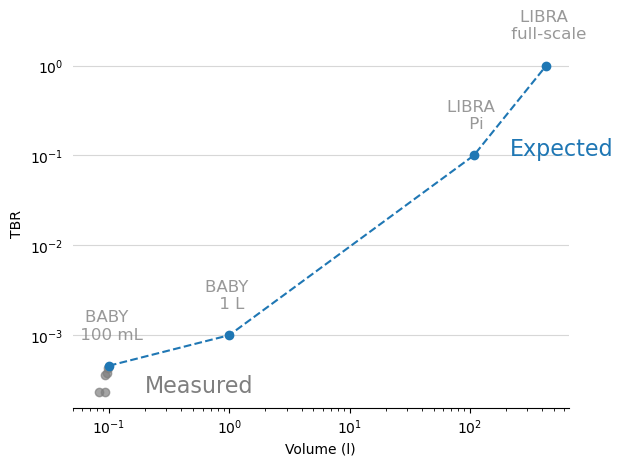

In [130]:
from simple_tritium_transport_model import activity_to_quantity

def compute_measured_TBR(module):
    model = module.baby_model
    irradiation_time = sum([irr[1] - irr[0] for irr in model.irradiations])
    neutron_fluence = model.neutron_rate * irradiation_time
    tritium_prod = activity_to_quantity(module.cumulative_release[-1])
    return (tritium_prod / neutron_fluence).to(ureg.dimensionless)

volumes = [100 * ureg.ml, 1 * ureg.liter, 107.5 * ureg.liter, 4 * 107.5 * ureg.liter]
volumes = ureg.Quantity.from_list(volumes).to(ureg.liter)
TBRs = [baby_run_7.calculated_TBR.magnitude, 1e-3, 1e-1, 1]
measured_tbr = [compute_measured_TBR(mod) for mod in [baby_run_7, baby_run_5, baby_run_3, baby_run_6, baby_run_8]]

plt.figure()
plt.plot(volumes, TBRs, "o--")

x_indices_measurements = [volumes[0]]*len(measured_tbr)
x_indices_measurements = ureg.Quantity.from_list(x_indices_measurements)
import numpy as np
x_indices_measurements = x_indices_measurements * (1 + np.random.normal(0, 0.1, len(measured_tbr)))

plt.scatter(x_indices_measurements, measured_tbr, color="tab:grey", alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(f"Volume ({volumes.units:~P})")
plt.ylabel("TBR")

plt.annotate("Expected", (volumes[-2] * 2, TBRs[-2]), fontsize=16, color="tab:blue")
plt.annotate("Measured", (volumes[0] * 2, measured_tbr[0]), fontsize=16, color="tab:grey")

plt.annotate("BABY \n 100 mL", (volumes[0], TBRs[0] * 2), fontsize=12, color="tab:grey", ha="center", alpha=0.8)
plt.annotate("BABY \n 1 L", (volumes[1], TBRs[1] * 2), fontsize=12, color="tab:grey", ha="center", alpha=0.8)
plt.annotate("LIBRA \n Pi", (volumes[-2], TBRs[-2] * 2), fontsize=12, color="tab:grey", ha="center", alpha=0.8)
plt.annotate("LIBRA \n full-scale", (volumes[-1], TBRs[-1] * 2), fontsize=12, color="tab:grey", ha="center", alpha=0.8)

# remove top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

# remove minor yticks
plt.gca().tick_params(axis="y", which="both", left=False)

plt.xlim(left=5e-2 * ureg.liter)
plt.ylim(top=2)

plt.grid(True, axis="y", alpha=0.5)

plt.savefig("tbr_vs_volume.svg", bbox_inches="tight")